import all packages

In [7]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

data loading

In [8]:
df=pd.read_csv("../data/raw/togo-dapaong_qc.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


checking missing value

In [9]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

describe state

In [10]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


outlier detection

In [11]:
z_scores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
df[(abs(z_scores) > 3).any(axis=1)]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
7860,2021-10-30 11:01,934.0,989.8,84.9,977.9,951.0,30.2,64.5,3.3,4.9,1.2,278.4,18.6,977,0,0.0,54.6,62.3,NaN
39532,2021-11-21 10:53,893.0,905.5,138.3,976.6,939.0,34.0,19.1,3.5,4.9,0.7,79.3,13.7,975,0,0.0,47.5,53.0,NaN
39542,2021-11-21 11:03,904.0,906.1,140.7,986.8,949.0,34.4,18.5,3.9,5.4,0.8,80.8,12.9,975,0,0.0,48.6,54.2,NaN
39543,2021-11-21 11:04,905.0,907.7,140.9,988.9,951.0,34.4,18.9,2.8,4.6,0.8,87.2,20.4,975,0,0.0,48.5,54.0,NaN
39544,2021-11-21 11:05,907.0,907.4,142.0,989.9,953.0,34.5,18.3,3.3,4.4,0.6,75.1,15.1,975,0,0.0,48.9,54.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510473,2022-10-14 11:54,709.5,63.7,629.8,703.1,694.9,30.2,66.6,3.5,4.4,0.8,167.0,15.2,977,0,0.0,46.8,51.6,NaN
510474,2022-10-14 11:55,677.8,40.6,621.7,670.1,662.2,30.2,66.7,2.8,3.6,0.6,175.1,19.7,977,0,0.0,46.8,51.6,NaN
510475,2022-10-14 11:56,659.5,29.7,614.9,651.0,643.4,30.3,66.1,4.1,4.9,0.5,174.0,11.5,977,0,0.0,46.8,51.6,NaN
510476,2022-10-14 11:57,660.1,40.7,605.6,653.2,645.6,30.2,66.0,3.7,4.6,0.7,165.4,21.6,977,0,0.0,46.6,51.4,NaN


plotting

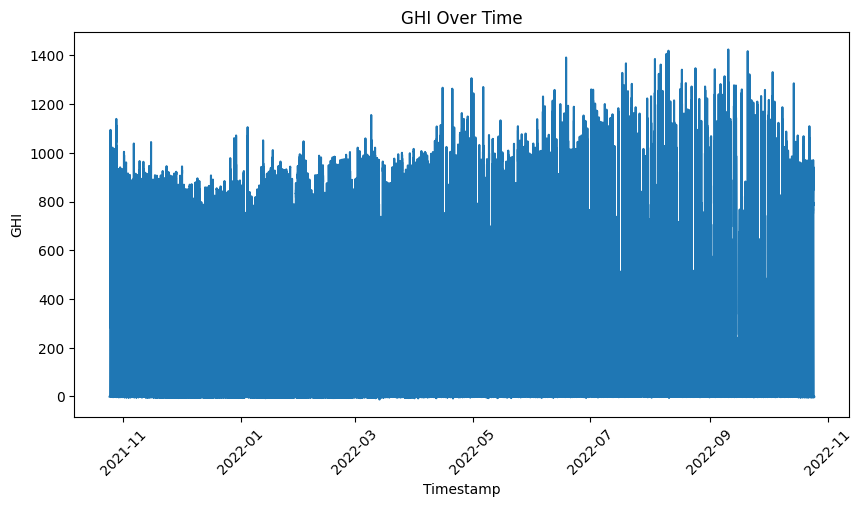

In [12]:
if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(10, 5))
sns.lineplot(x='Timestamp', y='GHI', data=df)
plt.title('GHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.xticks(rotation=45)
plt.show()